In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df=pd.read_csv('titanic_toy.csv')

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [6]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
x_train.shape,x_test.shape

((712, 3), (179, 3))

In [9]:
x_train.isnull().mean()

Age       0.196629
Fare      0.050562
Family    0.000000
dtype: float64

In [10]:
mean_age=x_train['Age'].mean()
median_age=x_train['Age'].median()

mean_fare=x_train['Fare'].mean()
median_fare=x_train['Fare'].median()


In [11]:
x_train.sample(5)

,Age,Fare,Family
38,18.0,18.0000,2
513,54.0,NaN,1
161,40.0,15.7500,0
60,22.0,7.2292,0
322,30.0,12.3500,0


In [12]:
x_train['Age_99']=x_train['Age'].fillna(99)
x_train['Age_minus1']=x_train['Age'].fillna(-1)

x_train['Fare_999']=x_train['Fare'].fillna(999)
x_train['Fare_minus1']=x_train['Fare'].fillna(-1)

In [13]:
print('Original Age variable variance:',x_train['Age'].var())
print(' Age variable variance after 99 imputation:',x_train['Age_99'].var())
print(' Age variable variance after -1 imputation:',x_train['Age_minus1'].var())

print('Original Fare variable variance:',x_train['Fare'].var())
print(' Fare variable variance after 999 imputation:',x_train['Fare_999'].var())
print(' Fare variable variance after -1 imputation:',x_train['Fare_minus1'].var())

Original Age variable variance: 210.2517072477435
 Age variable variance after 99 imputation: 932.9665366701432
 Age variable variance after -1 imputation: 315.9955036260055
Original Fare variable variance: 2761.0314349486343
 Fare variable variance after 999 imputation: 47525.470595360035
 Fare variable variance after -1 imputation: 2675.2394049177024


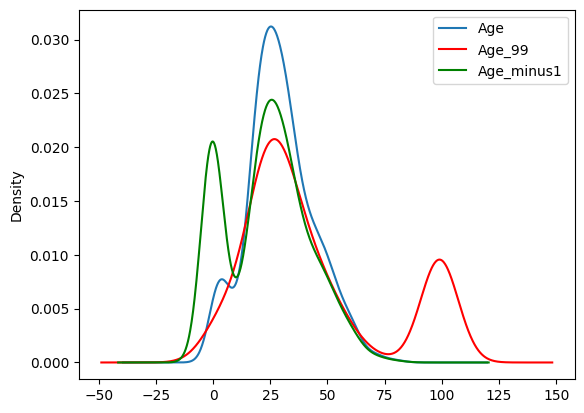

In [15]:
fig=plt.figure()
ax=fig.add_subplot(111)

#original variance distribution
x_train['Age'].plot(kind='kde',ax=ax)

#variable imputed with the median
x_train['Age_99'].plot(kind='kde',ax=ax,color='red')

#variance imputed with the mean
x_train['Age_minus1'].plot(kind='kde',ax=ax,color='green')

#add legends
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

<Axes: ylabel='Density'>

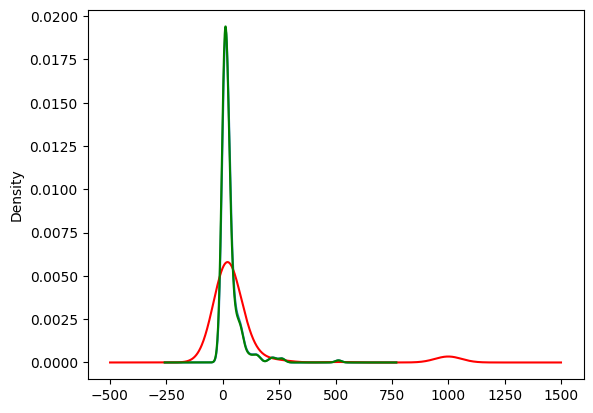

In [18]:
fig=plt.figure()
ax=fig.add_subplot(111)

#original variance distribution
x_train['Fare'].plot(kind='kde',ax=ax)

#variable imputed with the median
x_train['Fare_999'].plot(kind='kde',ax=ax,color='red')

#variance imputed with the mean
x_train['Fare_minus1'].plot(kind='kde',ax=ax,color='green')

In [19]:
x_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,130.495777,69.137162
Fare,75.481375,2761.031435,18.599163,-111.965046,135.785804,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-6.941982,-5.034556,16.878492,17.684447
Age_99,210.251707,-111.965046,-6.941982,932.966537,-166.460682,-255.051165,-101.137070
Age_minus1,210.251707,135.785804,-5.034556,-166.460682,315.995504,262.712284,124.270305
Fare_999,130.495777,2761.031435,16.878492,-255.051165,262.712284,47525.470595,1063.944817
Fare_minus1,69.137162,2761.031435,17.684447,-101.137070,124.270305,1063.944817,2675.239405


In [20]:
x_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.039967,0.085422
Fare,0.091482,1.000000,0.207193,-0.069365,0.145071,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.135079,-0.168329,0.046016,0.203212
Age_99,1.000000,-0.069365,-0.135079,1.000000,-0.306576,-0.038303,-0.064017
Age_minus1,1.000000,0.145071,-0.168329,-0.306576,1.000000,0.067792,0.135159
Fare_999,0.039967,1.000000,0.046016,-0.038303,0.067792,1.000000,0.094357
Fare_minus1,0.085422,1.000000,0.203212,-0.064017,0.135159,0.094357,1.000000


**using sklearn**

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [22]:
imputer1=SimpleImputer(strategy='constant',fill_value=99)
imputer2=SimpleImputer(strategy='constant',fill_value=999)

In [24]:
trf=ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare']),
])

In [26]:
trf.fit(x_train)

ColumnTransformer(transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [27]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [28]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [29]:
x_train=trf.transform(x_train)
x_test=trf.transform(x_test)

In [30]:
x_train

array([[ 45.5   ,  28.5   ],
       [ 23.    ,  13.    ],
       [ 32.    ,   7.925 ],
       ...,
       [ 41.    , 999.    ],
       [ 14.    , 120.    ],
       [ 21.    ,  77.2875]])